# Create Figures
This script replicates figures shown in the research paper:

P. Pastoriza, I.G. Torre, F. Diéguez, I. Gomez, S. Gelado, J. Bello, A. Ávila, J. Matías, V. Pytell, A. Hernandez-Fernandez (2020) Speech pause distribution as an early marker for Alzheimer’s disease. Submitted.

Maintainer=Ivan G Torre | Contact=igonzalez@vicomtech.org


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import lognorm
from scipy import stats
import math
import os

## Import data

In [2]:
dataRaw = pd.read_csv("FullData.csv", sep=";",  decimal=",")

dataRaw = dataRaw[dataRaw.duration>0.250]
dataRaw = dataRaw[dataRaw.duration<4]

alldata = dataRaw.duration.values
alldata = alldata[alldata<3]

CS = dataRaw[dataRaw.Grupo == "CS"].duration.values
DCLej = dataRaw[(dataRaw.Grupo == "DCLej") | (dataRaw.Grupo == "DClej")].duration.values
DCLtm = dataRaw[dataRaw.Grupo == "DCLtm"].duration.values
DTA = dataRaw[dataRaw.Grupo == "DTA"].duration.values


# Crete folder
if not os.path.exists('figures'):
    os.mkdir('figures')
output_path = "figures/"


# 1.- Figure 1. Subplots of data fit to LND

## 1.1.- LND fit values

In [3]:
x=np.linspace(0.25, 4, 500)

# Parameters obtained with the script FitData.R
LN_CS = stats.lognorm(scale=math.exp(-0.544933578103701), s= 0.768674498280962)
LN_DCLej = stats.lognorm(scale=math.exp(-0.413116995546443), s=0.731190326246725)
LN_DCLtm = stats.lognorm(scale=math.exp(-0.40124324248427), s=0.787601272575285)
LN_DTA = stats.lognorm(scale=math.exp(-0.290945429503336), s=0.864480144534173)


### Fit to histogram CS 

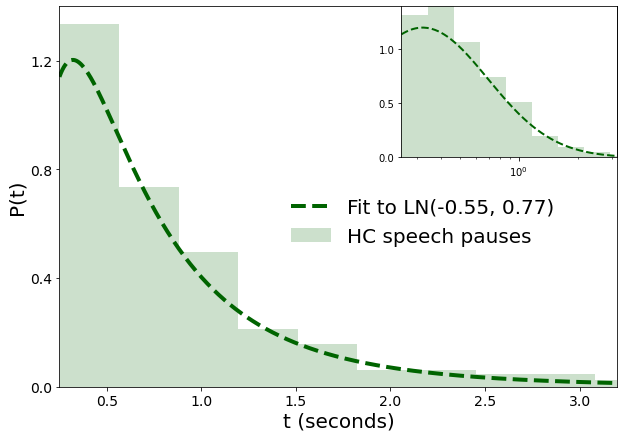

In [4]:
# MAIN PLOT
f, ax = plt.subplots(figsize=[10,7])
ax.hist(CS, density=True, bins=10, label = "HC speech pauses", color="darkgreen", alpha=0.2)
ax.plot(x, LN_CS.pdf(x), "--", lw=4, label = "Fit to LN(-0.55, 0.77)",color="darkgreen",)


ax.set_xlabel("t (seconds)", fontsize=14)
ax.set_ylabel("P(t)", fontsize=14)
# ax.set_xscale("log")

ax.set_xlabel("t (seconds)", fontsize=20)
ax.set_ylabel("P(t)", fontsize=20)
ax.set_xlim([0.25, 3.2])
ax.set_ylim([0, 1.4])

ax.legend(loc = [0.4,0.35], fontsize=20, frameon=False)
ax.set_yticks([0, 0.4, 0.8, 1.2])
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)



# # SUBPLOT
subax = plt.axes([ax.get_position().x1 - .3, ax.get_position().y1 - .3, .3, .3])
bins10=np.logspace(np.log10(0.25),np.log10(4.0), 10)
subax.hist(CS, density=True, bins=bins10, color="darkgreen", alpha=0.2)
subax.plot(x, LN_CS.pdf(x), "--", lw=2, color="darkgreen")

subax.set_xscale("log")
subax.set_xlim([0.25, 3.2])
subax.set_yticks([0, 0.5, 1])
subax.set_ylim([0, 1.4])


f.savefig(output_path + "CS_Fits.pdf", bbox_inches='tight')

### Adjust to histogram a-mdMCI-R 

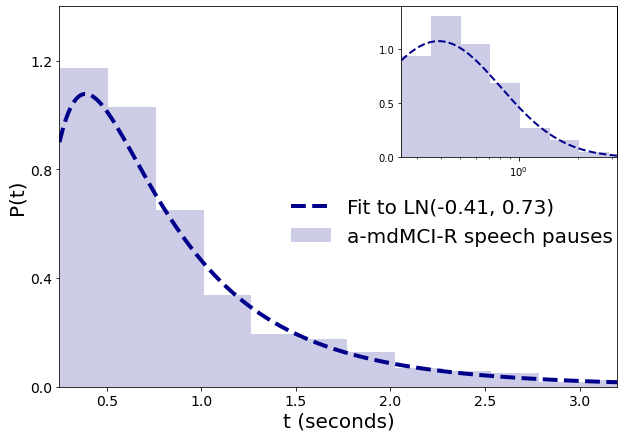

In [5]:
# MAIN PLOT
f, ax = plt.subplots(figsize=[10,7])
ax.hist(DCLej, density=True, bins=14, label = "a-mdMCI-R speech pauses", color="darkblue", alpha=0.2)
ax.plot(x, LN_DCLej.pdf(x), "--", lw=4, label = "Fit to LN(-0.41, 0.73)",color="darkblue",)


ax.set_xlabel("t (seconds)", fontsize=14)
ax.set_ylabel("P(t)", fontsize=14)

ax.set_xlabel("t (seconds)", fontsize=20)
ax.set_ylabel("P(t)", fontsize=20)
ax.set_xlim([0.25, 3.2])
ax.set_ylim([0, 1.4])

ax.legend(loc = [0.4,0.35], fontsize=20, frameon=False)
ax.set_yticks([0, 0.4, 0.8, 1.2])
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)


# SUBPLOT
subax = plt.axes([ax.get_position().x1 - .3, ax.get_position().y1 - .3, .3, .3])
bins10=np.logspace(np.log10(0.25),np.log10(4.1), 9)
subax.hist(DCLej, density=True, bins=bins10, color="darkblue", alpha=0.2)
subax.plot(x, LN_DCLej.pdf(x), "--", lw=2, color="darkblue")

subax.set_xscale("log")
subax.set_xlim([0.25, 3.2])
subax.set_ylim([0, 1.4])
subax.set_yticks([0, 0.5, 1])


f.savefig(output_path + "a-mdMCI-R_Fits.pdf", bbox_inches='tight')

### Adjust to histogram a-mdMCI-E

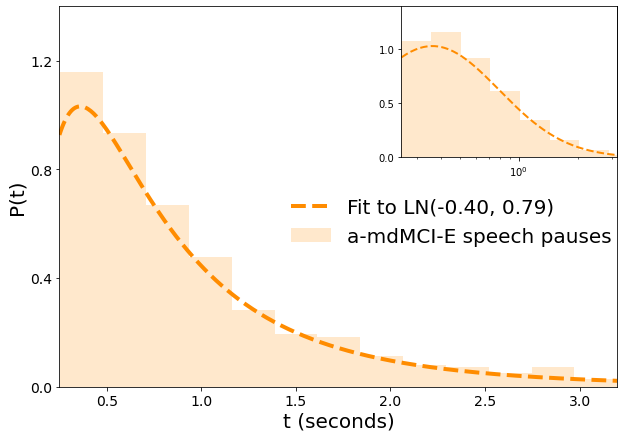

In [6]:
# MAIN PLOT
f, ax = plt.subplots(figsize=[10,7])
ax.hist(DCLtm, density=True, bins=15, label = "a-mdMCI-E speech pauses", color="darkorange", alpha=0.2)
ax.plot(x, LN_DCLtm.pdf(x), "--", lw=4, label = "Fit to LN(-0.40, 0.79)",color="darkorange")


ax.set_xlabel("t (seconds)", fontsize=14)
ax.set_ylabel("P(t)", fontsize=14)
# ax.set_xscale("log")

ax.set_xlabel("t (seconds)", fontsize=20)
ax.set_ylabel("P(t)", fontsize=20)
ax.set_xlim([0.25, 3.2])
ax.set_ylim([0, 1.4])

ax.legend(loc = [0.4,0.35], fontsize=20, frameon=False)
ax.set_yticks([0, 0.4, 0.8, 1.2])
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)



# # SUBPLOT
subax = plt.axes([ax.get_position().x1 - .3, ax.get_position().y1 - .3, .3, .3])
bins10=np.logspace(np.log10(0.25),np.log10(4.1), 9)
subax.hist(DCLtm, density=True, bins=bins10, color="darkorange", alpha=0.2)
subax.plot(x, LN_DCLtm.pdf(x), "--", lw=2, color="darkorange")

subax.set_xscale("log")
subax.set_xlim([0.25, 3.2])
subax.set_ylim([0, 1.4])
subax.set_yticks([0, 0.5, 1])


f.savefig(output_path + "a-mdMCI-E_Fits.pdf", bbox_inches='tight')

### Adjust to histogram DTA 

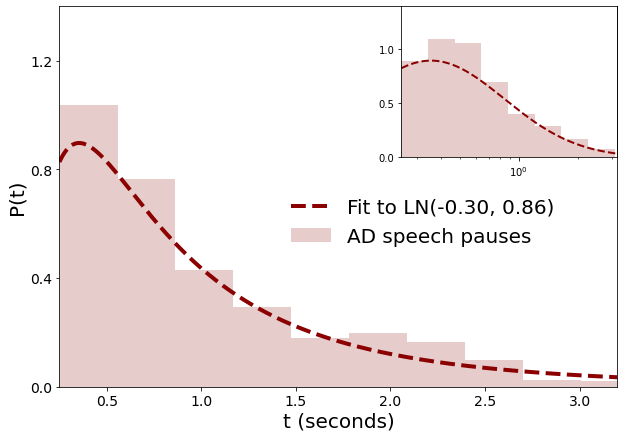

In [7]:
# MAIN PLOT
f, ax = plt.subplots(figsize=[10,7])
ax.hist(DTA, density=True, bins=12, label = "AD speech pauses", color="darkred", alpha=0.2)
ax.plot(x, LN_DTA.pdf(x), "--", lw=4, label = "Fit to LN(-0.30, 0.86)",color="darkred")


ax.set_xlabel("t (seconds)", fontsize=14)
ax.set_ylabel("P(t)", fontsize=14)
# ax.set_xscale("log")

ax.set_xlabel("t (seconds)", fontsize=20)
ax.set_ylabel("P(t)", fontsize=20)
ax.set_xlim([0.25, 3.2])
ax.set_ylim([0, 1.4])

ax.legend(loc = [0.4,0.35], fontsize=20, frameon=False)
ax.set_yticks([0, 0.4, 0.8, 1.2])
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)



# # SUBPLOT
subax = plt.axes([ax.get_position().x1 - .3, ax.get_position().y1 - .3, .3, .3])
bins10=np.logspace(np.log10(0.25),np.log10(3.1), 9)
subax.hist(DTA, density=True, bins=bins10, color="darkred", alpha=0.2)
subax.plot(x, LN_DTA.pdf(x), "--", lw=2, color="darkred")

subax.set_xscale("log")
subax.set_xlim([0.25, 3.2])
subax.set_ylim([0, 1.4])

subax.set_yticks([0, 0.5, 1])


f.savefig(output_path + "DTA_Fits.pdf", bbox_inches='tight')

# 2.- Figure 2. LND comparison

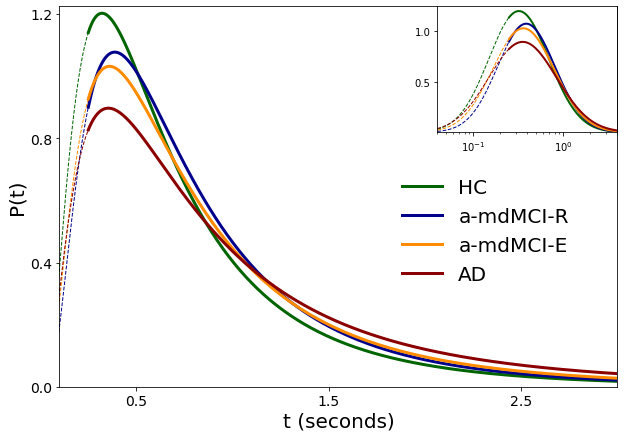

In [8]:
x2=np.linspace(0.04, 0.25, 500)

# # MAIN PLOT

f,ax = plt.subplots(figsize=[10,7])
ax.plot(x, LN_CS.pdf(x), lw = 3, label="HC", c="darkgreen")
ax.plot(x, LN_DCLej.pdf(x), lw = 3, label="a-mdMCI-R", c="darkblue")
ax.plot(x, LN_DCLtm.pdf(x), lw = 3, label="a-mdMCI-E", c="darkorange")
ax.plot(x, LN_DTA.pdf(x), lw = 3, label= "AD", c= "darkred")

ax.plot(x2, LN_CS.pdf(x2), '--',lw = 1, c="darkgreen")
ax.plot(x2, LN_DCLej.pdf(x2),'--', lw = 1, c="darkblue")
ax.plot(x2, LN_DCLtm.pdf(x2),'--', lw = 1, c="darkorange")
ax.plot(x2, LN_DTA.pdf(x2),'--', lw = 1, c= "darkred")

ax.set_xlabel("t (seconds)", fontsize=20)
ax.set_ylabel("P(t)", fontsize=20)

ax.set_xlim([0.1, 3])
ax.set_ylim([0, 1.225])

ax.legend(loc = [0.6,0.25], fontsize=20, frameon=False)

ax.set_xticks([0.5, 1.5, 2.5])
ax.set_yticks([0, 0.4, 0.8, 1.2])

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)


# # SUBPLOT

subax = plt.axes([ax.get_position().x1 - .25, ax.get_position().y1 - .25, .25, .25])
subax.plot(x, LN_CS.pdf(x), lw = 2, c="darkgreen")
subax.plot(x, LN_DCLej.pdf(x), lw = 2, c="darkblue")
subax.plot(x, LN_DCLtm.pdf(x), lw = 2, c="darkorange")
subax.plot(x, LN_DTA.pdf(x), lw = 2, c= "darkred")

subax.plot(x2, LN_CS.pdf(x2), '--',lw = 1, c="darkgreen")
subax.plot(x2, LN_DCLej.pdf(x2),'--', lw = 1, c="darkblue")
subax.plot(x2, LN_DCLtm.pdf(x2),'--', lw = 1, c="darkorange")
subax.plot(x2, LN_DTA.pdf(x2),'--', lw = 1, c= "darkred")

subax.set_yticks([0.5,1])
subax.set_xlim([0.04, 4])
subax.set_ylim([0, 1.25])

subax.set_xscale("log")

f.savefig(output_path + "LN_Fits.pdf", bbox_inches='tight')



# 3. ROC Curves1

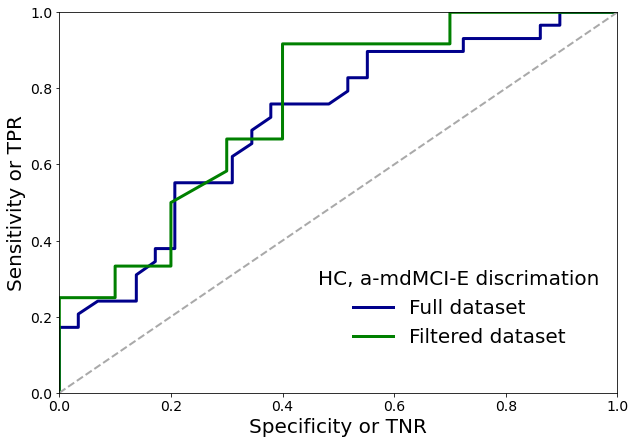

In [9]:
ROC1 = pd.read_csv("Grafica1ROC.csv",sep=",",  decimal=".")
ROC2 = pd.read_csv("Grafica2ROC.csv",sep=",",  decimal=".")

f,ax = plt.subplots(figsize=[10,7])

ax.plot(ROC1.Especificidad, ROC1.Sensibilidad, lw = 3, label="Full dataset", c="darkblue")
ax.plot(ROC2.Especificidad, ROC2.Sensibilidad, lw = 3, label="Filtered dataset", c="green")
ax.plot([0,1], [0,1], "--", lw = 2, c="darkgrey")

ax.legend(loc = [0.45,0.1], fontsize=20, frameon=False, title="HC, a-mdMCI-E discrimation", title_fontsize=20)

ax.set_xlabel("Specificity or TNR", fontsize=20)
ax.set_ylabel("Sensitivity or TPR", fontsize=20)

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

f.savefig(output_path + "ROCcurve.pdf", bbox_inches='tight')


#HC, a-mdMCI-R discrimation